In [1]:
import numpy as np
from scipy.integrate import solve_ivp, solve_bvp
from tqdm import tqdm
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from skimage import io

In [2]:
def make_movie(hs, cmap='plasma'):
    N = len(hs)
    T = hs[0].shape[0]
    mins = list(map(np.amin, hs))
    maxes = list(map(np.amax, hs))
    fig, ax = plt.subplots(1, N, figsize=(6*N, 6))
    panels = []         
    for n in range(N): 
        if N == 1: 
            p = ax.imshow(hs[0][0], cmap=cmap, origin='lower')
            fig.colorbar(p, shrink=0.7)
        else: 
            p = ax[n].imshow(hs[n][0], vmin=mins[n], vmax=maxes[n], cmap=cmap, origin='lower')
            fig.colorbar(p, ax=ax[n], shrink=0.7)
        panels.append(p)
    
    def animate(i): 
        for n in range(N):
            panels[n].set_data(hs[n][i])
        return panels

    ani = animation.FuncAnimation(fig, animate, interval=50, blit=True,
                                    repeat_delay=1000, frames=T)
    plt.close() 
    return ani 

In [4]:
filename = 'Xin data/rep3_flow1/rep3_flow1_u.npy'
vx = np.load(filename)
print(vx.shape)

filename = 'Xin data/rep3_flow1/rep3_flow1_v.npy'
vy = np.load(filename)

filename = 'Xin data/rep3_flow1/rep3_flow1_x.npy'
x = np.load(filename)
print(x.shape)

filename = 'Xin data/rep3_flow1/rep3_flow1_y.npy'
y = np.load(filename)

(180, 63, 63)
(63, 63)


In [73]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

ani = make_movie([actin], cmap='viridis')
ani.save('actin.mp4', writer=writer)

In [59]:
ani = make_movie([-vy, vx], cmap='PiYG')
HTML(ani.to_jshtml())

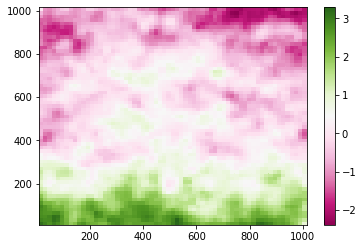

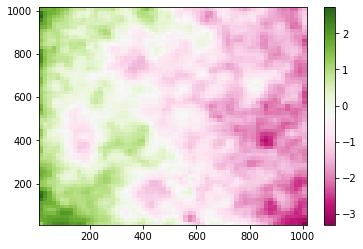

In [5]:
plt.pcolor(x, y, -vy[60], cmap='PiYG')
plt.colorbar() 
plt.show()

plt.pcolor(x, y, vx[60], cmap='PiYG')
plt.colorbar() 
plt.show()